# K折验证，加上各类指标

In [19]:
def print_formula(feature_names,coefs):
    equation = "y = "
    for i, name in enumerate(feature_names):
        coef = coefs[i]
        if coef >= 0:
            eq = " + " + str(coef) + "*" + name  
        else:
            eq = " - " + str(-coef) + "*" + name
        equation += eq
    
    equation += " + " + str(model.intercept_)  

    
    print(equation)

             ΔS     lnr     △EA     Wt   RCE*
0     44.383216  0.0000 -0.1936  0.001  0.906
1     56.752785 -0.0001 -0.2577  0.005  0.842
2    107.200000 -0.0005 -0.5932  0.010  0.507
3    141.947466 -0.0021 -0.6385  0.050  0.461
4    165.273302 -0.0019 -0.7079  0.100  0.392
..          ...     ...     ...    ...    ...
70  -142.724017 -0.0005  0.0437  0.001  1.059
71  -360.474614 -0.0045  0.0549  0.005  1.134
72  -351.400000 -0.0031  0.1026  0.010  1.247
73    54.623903  0.0041  1.1632  0.050  2.782
74 -4166.667244  0.0139  1.6270  0.100  5.090

[75 rows x 5 columns]
y =  + 0.0*1 - 0.17401243438914799*x0 + 0.2574197178687791*x1 - 0.020515344639303257*x0^2 - 0.21365464370635037*x0 x1 + 0.08742998701857775*x1^2 + -0.2284479822990447
(-66.15572878212244, 0.23259482417863125, 0.3219641143648484, -66.28906544080701)
y =  + 0.0*1 - 0.14716281475797643*x0 + 0.2293350364648212*x1 - 0.013045023641409532*x0^2 - 0.18612417830530467*x0 x1 + 0.07241825595807583*x1^2 + -0.2258987131956393
(-3.12178

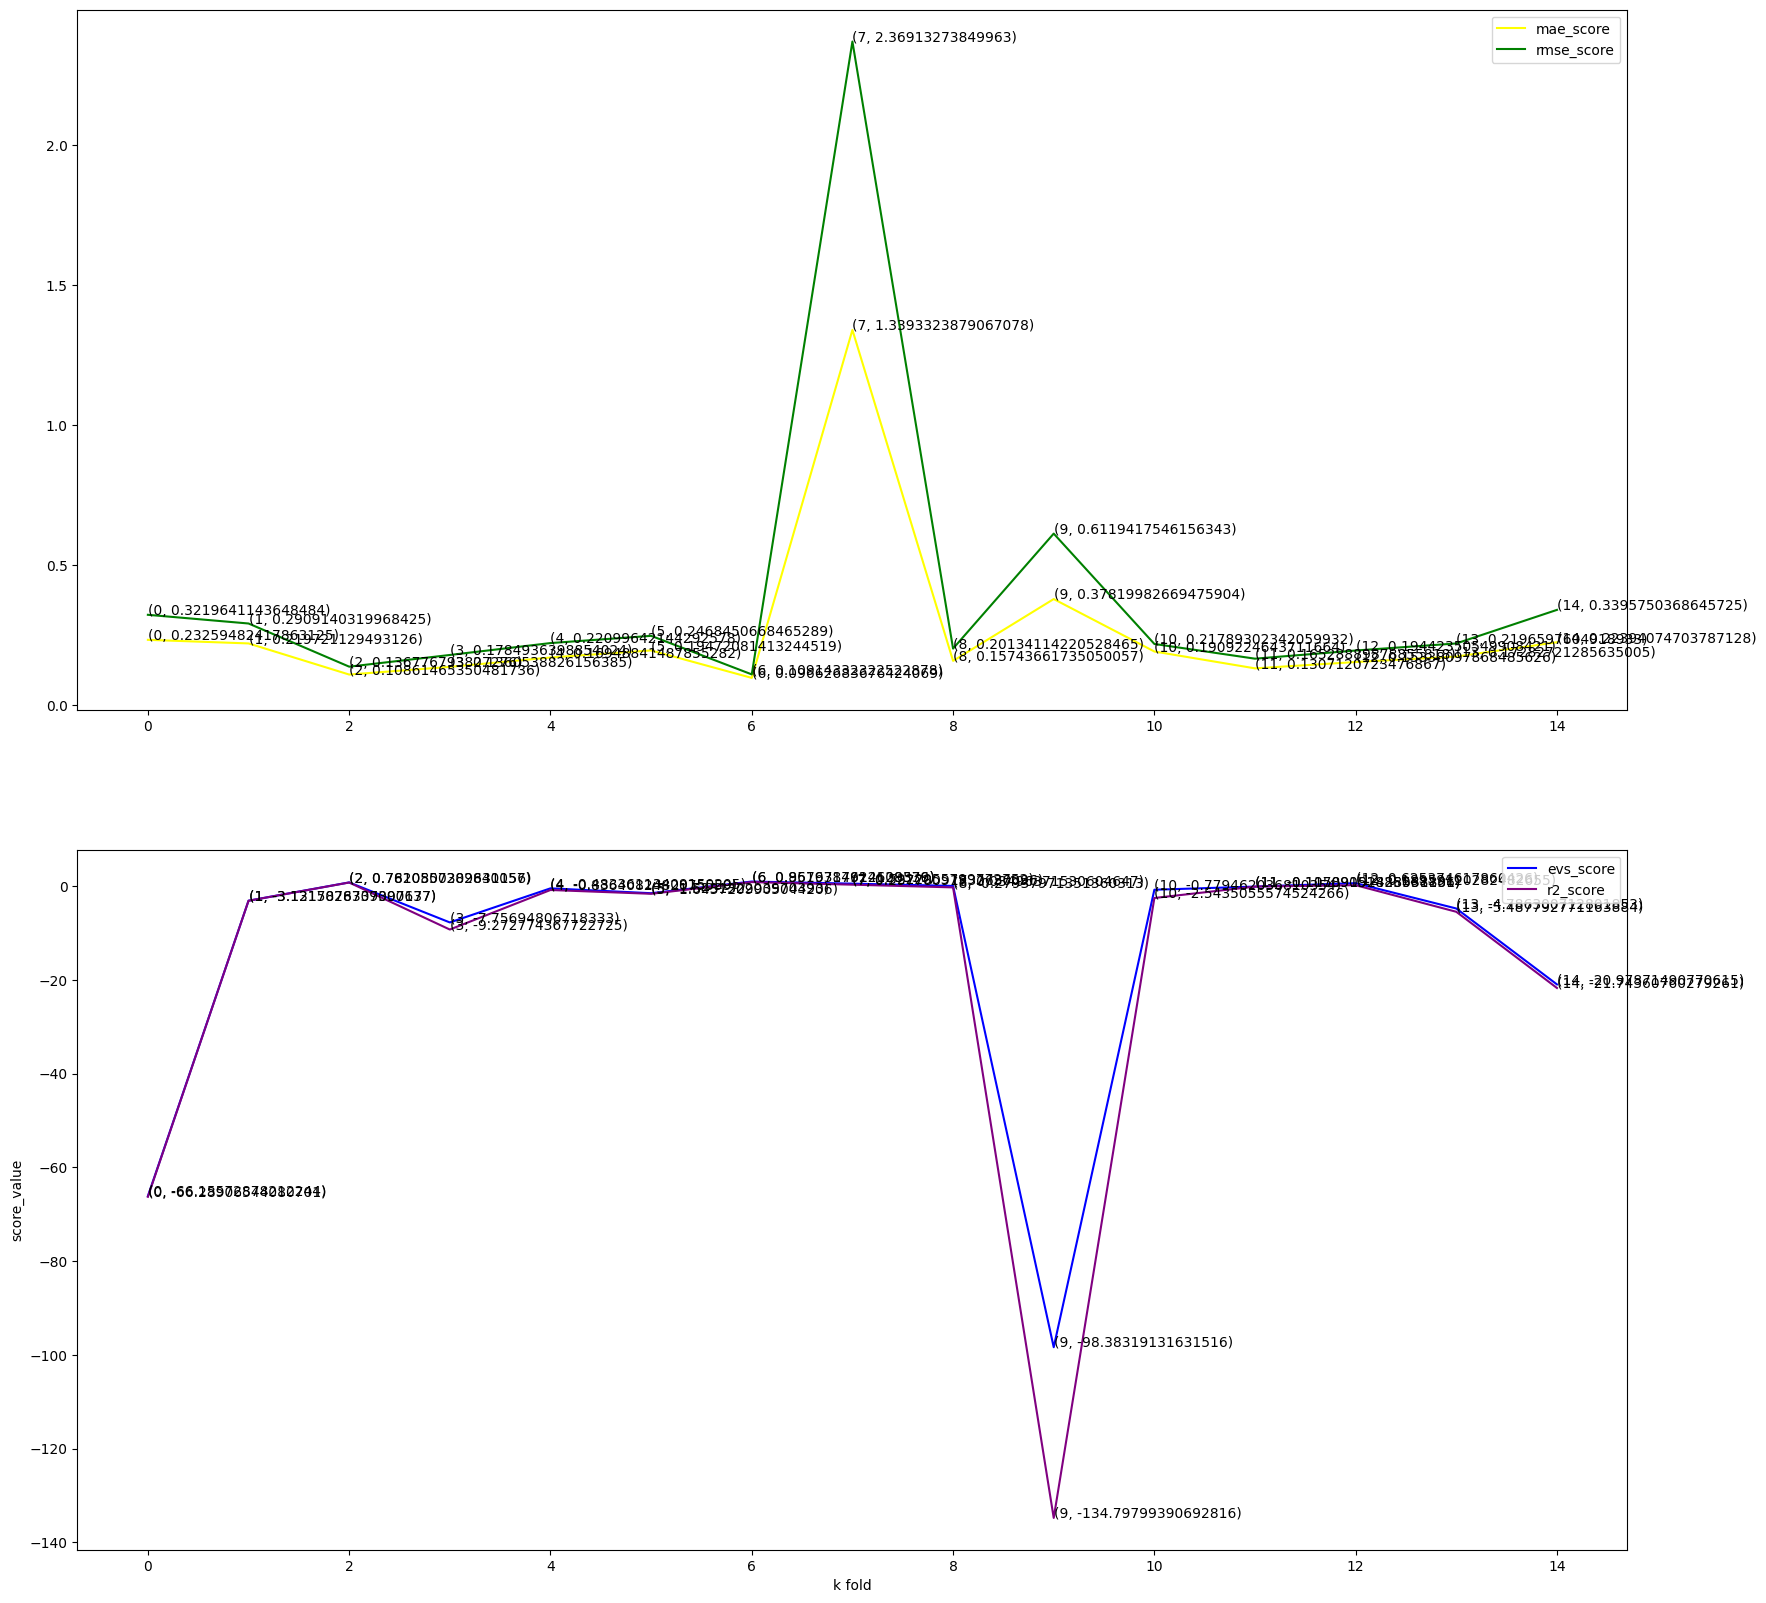

In [20]:
%matplotlib inline

import pandas as pd
import math
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
# 计算不同的指标
def calc_metrics(y_test,y_pred):
    evs_score = explained_variance_score(y_pred, y_test)
    mae_score = mean_absolute_error(y_pred,y_test)
    rmse_score = math.sqrt(mean_squared_error(y_pred, y_test))
    r2score = r2_score(y_pred, y_test)
    return evs_score,mae_score,rmse_score,r2score

# 读取数据
data =  pd.read_excel("/Volumes/17194110228/projects/PycharmProjects汪雷/data.xlsx",sheet_name="C")
print(data)
# 读取X，y
X = data.iloc[:,0:2]
y = data.iloc[:,2]
X = X.to_numpy()
y = y.to_numpy()
# 进行标准化
std = preprocessing.StandardScaler()
std.fit(X)
X = std.transform(X)

kfold_splits_num = 15
# k折训练，计算
kf = KFold(n_splits=kfold_splits_num, shuffle=True, random_state=42)

# 画图
plt.figure(figsize=(20,20))

evs_score_list,mae_score_list,rmse_score_list,r2score_list = [],[],[],[]
for index,(train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # 非线性回归
    ployfeat = PolynomialFeatures(degree=2)  # 根据degree的值转换为相应的多项式（非线性回归）
    model = LinearRegression()
    model.fit(ployfeat.fit_transform(X_train), y_train)
    y_pred = model.predict(ployfeat.fit_transform(X_test))

    # model = LinearRegression()
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    
    scores = calc_metrics(y_test,y_pred)
    evs_score_list.append(scores[0])
    mae_score_list.append(scores[1])
    rmse_score_list.append(scores[2])
    r2score_list.append(scores[3])
    print_formula(ployfeat.get_feature_names_out(),model.coef_)
    print(scores)

plt.subplot(2,1,1)
plt.plot(range(kfold_splits_num),mae_score_list,label="mae_score",c="yellow")
plt.plot(range(kfold_splits_num),rmse_score_list,label="rmse_score",c="g")
plt.legend()

for x,y in zip(range(kfold_splits_num), mae_score_list):
    plt.annotate(str((x,y)), (x,y))
    
for x,y in zip(range(kfold_splits_num), rmse_score_list):
    plt.annotate(str((x,y)), (x,y))

plt.subplot(2,1,2)
plt.plot(range(kfold_splits_num),evs_score_list,label="evs_score",c="b")
plt.plot(range(kfold_splits_num),r2score_list,label="r2_score",c="purple")

# 给每个点添加坐标信息  
for x,y in zip(range(kfold_splits_num), evs_score_list):
    plt.annotate(str((x,y)), (x,y), rotation=0)


for x,y in zip(range(kfold_splits_num), r2score_list):
    plt.annotate(str((x,y)), (x,y), rotation=0)

print(max(evs_score_list),max(r2score_list))
plt.legend()
plt.xlabel("k fold")
plt.ylabel("score_value")
plt.show()

C = 0.1632770775109387*x0 + 0.2730767610750887*x1 - 0.018611874740261988*x0^2 - 0.20928055921356387*x0*x1 + 0.09069211837087676*x1^2 - 0.24150277473075404